To do: import the databse table for the master dataset

In [297]:
import pandas as pd
import matplotlib as plt
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import json
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [298]:
df = pd.read_csv('wine_master_dataset.csv', index_col=0)

In [299]:
df.head()

,product_name,price,varietal,...,region,appellation,year
0,Dom Perignon Vintage with Gift Box,199,Vintage Sparkling Wine,...,France,Champagne,2010
2,Duckhorn Napa Valley Cabernet Sauvignon,78,Cabernet Sauvignon,...,California,Napa Valley,2017
3,Caymus Special Selection Cabernet Sauvignon,180,Cabernet Sauvignon,...,California,Napa Valley,2016
4,Quintessa,199,Cabernet Sauvignon,...,California,Napa Valley,2016
5,Joseph Phelps Insignia,300,Bordeaux Red Blends,...,California,Napa Valley,2016


##  Wine entries - Global

In [300]:
pd.set_option('max_columns', 6)

In [301]:
world_map = gpd.read_file('Longitude_Graticules_and_World_Countries_Boundaries-shp/99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp')

In [302]:
world_map.head()

,OBJECTID,CNTRY_NAME,geometry
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."


In [303]:
world_map.crs

{'init': 'epsg:4326'}

In [304]:
world_map.head()

,OBJECTID,CNTRY_NAME,geometry
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."


In [305]:
world_map = world_map[(world_map.CNTRY_NAME != "Antarctica") & (world_map.CNTRY_NAME != "Fr. S. Antarctic Lands")]

In [306]:
#world_map.plot(figsize=(15,15), edgecolor="green", facecolor="None");

In [307]:
df_counts = df.region.value_counts().reset_index().rename( columns={'index': 'region', 'count': 'count'})
#df_counts.to_csv('df_counts.csv', index=False)

In [308]:
df2 = pd.read_csv('df_counts.csv')
df2.rename(columns={'region.1': 'count'}, inplace = True)
df2

,region,count,country
0,California,8482,United States
1,France,6245,France
2,Italy,3436,Italy
3,Australia,832,Australia
4,Washington,803,United States
5,Spain,656,Spain
6,Oregon,393,United States
7,Argentina,311,Argentina
8,Germany,277,Germany
9,New Zealand,163,New Zealand


In [309]:
agg = {'count': 'sum'}
df_new = df2.groupby(df2['country']).aggregate(agg)
df_new.reset_index()

,country,count
0,Argentina,311
1,Australia,832
2,Austria,79
3,Chile,158
4,France,6245
5,Germany,277
6,Greece,18
7,Italy,3436
8,New Zealand,163
9,Portugal,86


In [310]:
# Merge datasets
merged = world_map.merge(df_new, left_on = 'CNTRY_NAME', right_on = 'country', how = 'left')

In [311]:
merged.crs

{'init': 'epsg:4326'}

In [312]:
merged.to_crs('epsg:3857')

/opt/miniconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,OBJECTID,CNTRY_NAME,geometry,count
0,1,Aruba,"POLYGON ((-7779254.556 1392531.480, -7786458.3...",NaN
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-6872741.975 1983840.567, -687...",NaN
2,3,Afghanistan,"POLYGON ((6821275.225 4246712.791, 6823482.132...",NaN
3,4,Algeria,"POLYGON ((-573533.033 3526768.674, -572089.488...",NaN
4,5,Azerbaijan,"MULTIPOLYGON (((5012252.392 5016848.546, 50104...",NaN
...,...,...,...,...
245,247,Western Samoa,"MULTIPOLYGON (((-19213354.112 -1517957.781, -1...",NaN
246,248,Swaziland,"POLYGON ((3439710.224 -3095008.663, 3437576.56...",NaN
247,249,Yemen,"MULTIPOLYGON (((5419744.135 1578519.111, 54112...",NaN
248,250,Zambia,"POLYGON ((3363297.613 -1687093.082, 3363982.14...",NaN


###  World Map of Wine Regions 

In [313]:
#merged['count'] = merged['count'].astype(int)

In [314]:
merged.describe()

,OBJECTID,count
count,250.000000,13.000000
mean,126.444000,1691.923077
std,72.405033,3012.875328
min,1.000000,18.000000
25%,64.250000,86.000000
50%,126.500000,277.000000
75%,188.750000,832.000000
max,251.000000,9694.000000


In [315]:
merged.crs

{'init': 'epsg:4326'}

In [335]:
# Import packages for building map
import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource, CustomJS,
                          CustomJSFilter, GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure

# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = merged.to_json())

In [336]:
# Define color palettes
palette = brewer['BuPu'][4]
palette = palette[::-1] # reverse order of colors so higher values have darker colors

# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 8000, nan_color='#ececec')

# Define custom tick labels for color bar.
#tick_labels = {'0': '0', '10': '10','2000':'2000', '3000': '3000', '4000':'4000', '6000': '6000','8000': '8000+'}

# Create color bar.
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal')
                     #major_label_overrides = tick_labels)

# Create figure object.
p = figure(title = 'Count of Wine Entries for Each Country in the Dataset ', plot_height = 600 ,
           plot_width = 950, toolbar_location = 'above',
           tools = 'pan, wheel_zoom, box_zoom, reset', 
           x_axis_type= 'mercator', y_axis_type= 'mercator')
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.axis.visible = False

# Add patch renderer to figure.
countries = p.patches('xs','ys', source = geosource,
                   fill_color = {'field' :'count', 'transform' : color_mapper},
                   line_color = 'gray', line_width = 0.25, fill_alpha = 10)

# Create hover tool
p.add_tools(HoverTool(renderers = [countries],
                      tooltips = [('country','@CNTRY_NAME'),('count', '@count')]))

# Specify layout
p.add_layout(color_bar, 'below')

show(p)

## Wine entries - US only 

In [337]:
df_us = df2[(df2.country == "United States") & (df2.region != "Other U.S.")]
df_us = df_us[['region', 'count']]

In [338]:
us_map = gpd.read_file('tl_2017_us_state/tl_2017_us_state.shp')
us_map = us_map[['REGION', 'NAME', 'geometry']].copy()

In [339]:
us_map.head()

,REGION,NAME,geometry
0,3,West Virginia,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,Florida,"MULTIPOLYGON (((-82.98748 24.62538, -82.98748 ..."
2,2,Illinois,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,Minnesota,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,Maryland,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."


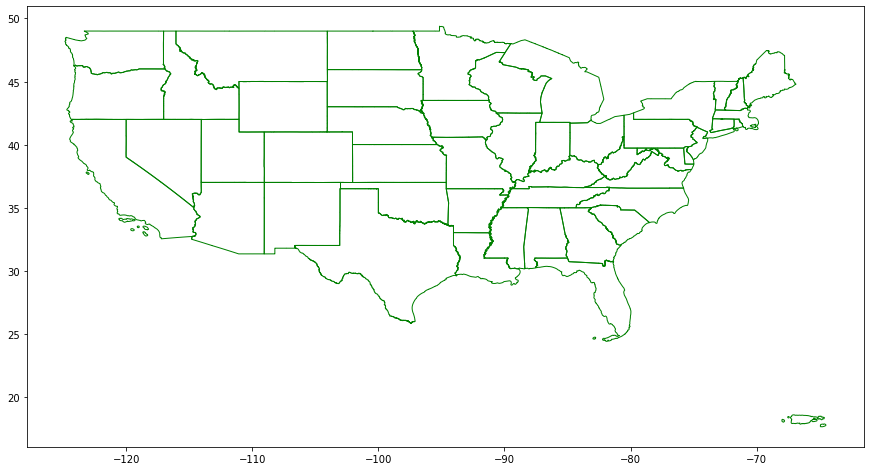

In [340]:
us_map = us_map.loc[~us_map['NAME'].isin(['Alaska', 'Hawaii', 'Commonwealth of the Northern Mariana Islands', 'Guam', 'American Samoa'])]
us_map.plot(figsize=(15,15), edgecolor="green", facecolor="None");

In [341]:
merged2 = us_map.merge(df_us, left_on = 'NAME', right_on = 'region', how = 'outer')

In [342]:
# Drop Alaska and Hawaii
merged2 = merged2.loc[~merged2['NAME'].isin(['Alaska', 'Hawaii', 'Commonwealth of the Northern Mariana Islands', 'Guam', 'American Samoa'])]

In [343]:
merged2

,REGION,NAME,geometry,region,count
0,3,West Virginia,"POLYGON ((-81.74725 39.09538, -81.74635 39.096...",NaN,NaN
1,3,Florida,"MULTIPOLYGON (((-82.98748 24.62538, -82.98748 ...",NaN,NaN
2,2,Illinois,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",NaN,NaN
3,2,Minnesota,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",NaN,NaN
4,3,Maryland,"POLYGON ((-77.45881 39.22027, -77.45866 39.220...",NaN,NaN
5,1,Rhode Island,"MULTIPOLYGON (((-71.67881 41.15891, -71.67626 ...",NaN,NaN
6,4,Idaho,"POLYGON ((-116.89971 44.84061, -116.89967 44.8...",NaN,NaN
7,1,New Hampshire,"POLYGON ((-72.32990 43.60021, -72.32984 43.600...",NaN,NaN
8,3,North Carolina,"POLYGON ((-82.41674 36.07283, -82.41660 36.073...",NaN,NaN
9,1,Vermont,"POLYGON ((-73.31328 44.26413, -73.31274 44.265...",NaN,NaN


###  US Map of Wine Regions  

In [410]:
# Input GeoJSON source that contains features for plotting
geosource2 = GeoJSONDataSource(geojson = merged2.to_json())

In [411]:
# Define color palettes
palette = brewer['RdPu'][4]
palette = palette[::-1] # reverse order of colors so higher values have darker colors

# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 8000, nan_color='#ececec')

# Define custom tick labels for color bar.
#tick_labels = {'0': '0', '10': '10','2000':'2000', '3000': '3000', '4000':'4000', '6000': '6000','8000': '8000+'}

# Create color bar.
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal')
                     #major_label_overrides = tick_labels)

# Create figure object.
p = figure(title = 'Count of Wine Entries for Each US State in the Dataset', 
           plot_height = 600 ,
           plot_width = 800,
           toolbar_location = 'above',
           tools = 'pan, wheel_zoom, box_zoom, reset', 
           x_axis_type= 'mercator', y_axis_type= 'mercator')
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.axis.visible = False

# Add patch renderer to figure.
states = p.patches('xs','ys', source = geosource2,
                   fill_color = {'field' :'count', 'transform' : color_mapper},
                   line_color = 'gray', line_width = 0.25, fill_alpha = 10)

# Create hover tool
p.add_tools(HoverTool(renderers = [states],
                      tooltips = [('state','@NAME'),('count', '@count')]))

# Specify layout
p.add_layout(color_bar, 'below')

show(p)

## Wine entries - California 

In [352]:
ca_counties = gpd.read_file('CA_avas_shapefile/CA_avas.shp')
#ca_counties = ca_counties[['NAME', 'geometry']].copy()

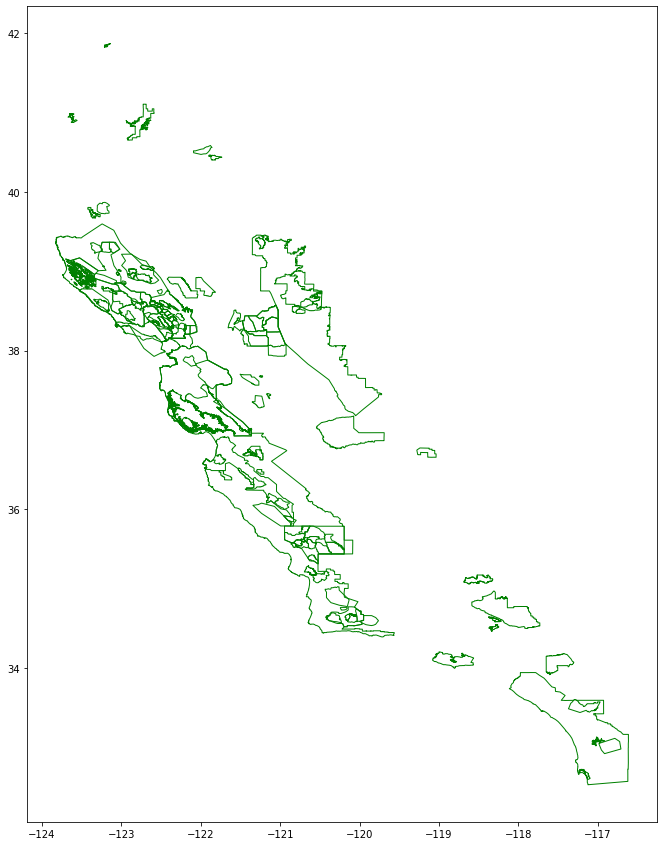

In [353]:
ca_counties.plot(figsize=(15,15), edgecolor="green", facecolor="None");

In [392]:
ca_counties.crs = {'init' :'epsg:4326'}

In [393]:
ca_counties.crs

{'init': 'epsg:4326'}

In [394]:
df.shape

(22071, 8)

In [395]:
df['appellation'] = df['appellation'].str.strip()

In [396]:
# us_map = us_map[['REGION', 'NAME', 'geometry']].copy()
ca_counties = ca_counties[['name', 'geometry']].copy()
ca_counties

,name,geometry
0,Central Coast,"POLYGON ((-121.80091 36.86127, -121.80177 36.8..."
1,North Coast,"POLYGON ((-122.89598 38.31281, -122.89819 38.3..."
2,Sierra Foothills,"POLYGON ((-121.30275 39.45455, -121.27443 39.4..."
3,South Coast,"POLYGON ((-117.97643 33.94608, -117.87626 33.9..."
4,San Francisco Bay,"POLYGON ((-121.58611 37.18804, -121.47249 37.1..."
...,...,...
136,Saddle Rock- Malibu,"POLYGON ((-118.84014 34.11422, -118.83996 34.1..."
137,River Junction,"POLYGON ((-121.26404 37.67618, -121.26346 37.6..."
138,Benmore Valley,"POLYGON ((-123.02983 39.02382, -123.02103 39.0..."
139,Malibu-Newton Canyon,"POLYGON ((-118.81516 34.07700, -118.81524 34.0..."


In [397]:
ca_counties['name'].sort_values().unique()

array(['Adelaida District', 'Alexander Valley', 'Alisos Canyon',
       'Alta Mesa', 'Anderson Valley',
       'Antelope Valley of the California High Desert',
       'Arroyo Grande Valley', 'Arroyo Seco', 'Atlas Peak',
       'Ballard Canyon', 'Ben Lomond Mountain', 'Benmore Valley',
       'Bennett Valley', 'Big Valley District-Lake County',
       'Borden Ranch', 'California Shenandoah Valley', 'Calistoga',
       'Capay Valley', 'Carmel Valley', 'Central Coast', 'Chalk Hill',
       'Chalone', 'Chiles Valley', 'Cienega Valley', 'Clarksburg',
       'Clear Lake', 'Clements Hills', 'Cole Ranch', 'Coombsville',
       'Cosumnes River', 'Covelo', 'Creston District', 'Cucamonga Valley',
       'Diablo Grande', 'Diamond Mountain District', 'Dos Rios',
       'Dry Creek Valley', 'Dunnigan Hills',
       'Eagle Peak Mendocino County', 'Edna Valley', 'El Dorado',
       'El Pomar District', 'Fair Play', 'Fiddletown',
       'Fort Ross-Seaview', 'Fountaingrove District',
       'Green Valley

In [398]:
ca_counties.shape

(141, 2)

In [399]:
df_ca = df[(df.region == " California")]

In [400]:
df_ca.head()

,product_name,price,varietal,...,region,appellation,year
2,Duckhorn Napa Valley Cabernet Sauvignon,78,Cabernet Sauvignon,...,California,Napa Valley,2017
3,Caymus Special Selection Cabernet Sauvignon,180,Cabernet Sauvignon,...,California,Napa Valley,2016
4,Quintessa,199,Cabernet Sauvignon,...,California,Napa Valley,2016
5,Joseph Phelps Insignia,300,Bordeaux Red Blends,...,California,Napa Valley,2016
6,Opus One,364,Bordeaux Red Blends,...,California,Napa Valley,2017


In [401]:
df_ca['appellation'].sort_values().unique()

array(['Carneros', 'Central Coast', 'Lodi', 'Mendocino', 'Napa Valley',
       'North Coast', 'Santa Cruz Mountains', 'Sierra Foothills',
       'Sonoma County'], dtype=object)

In [402]:
# replace Carneros to Los Carneros and Sonoma Valley to Sonoma County to match the names in the shapefile. 
df_ca['appellation'].replace('Carneros', 'Los Carneros', inplace =True)
df_ca['appellation'].replace('Sonoma Valley', 'Sonoma County', inplace =True)

/opt/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [403]:
df_counts3 = df_ca.appellation.value_counts().reset_index().rename(columns={"appellation": "appellation", "appellation": "count"})

In [404]:
df_counts3

,index,count
0,Napa Valley,4670
1,Sonoma County,2023
2,Central Coast,1202
3,Santa Cruz Mountains,222
4,Los Carneros,156
5,Mendocino,112
6,North Coast,107
7,Sierra Foothills,22
8,Lodi,7


In [405]:
merged3 = ca_counties.merge(df_counts3, left_on = 'name', right_on = 'index', how = 'left')

In [406]:
merged3.head()

,name,geometry,index,count
0,Central Coast,"POLYGON ((-121.80091 36.86127, -121.80177 36.8...",Central Coast,1202.0
1,North Coast,"POLYGON ((-122.89598 38.31281, -122.89819 38.3...",North Coast,107.0
2,Sierra Foothills,"POLYGON ((-121.30275 39.45455, -121.27443 39.4...",Sierra Foothills,22.0
3,South Coast,"POLYGON ((-117.97643 33.94608, -117.87626 33.9...",NaN,NaN
4,San Francisco Bay,"POLYGON ((-121.58611 37.18804, -121.47249 37.1...",NaN,NaN


In [407]:
merged3.crs

{'init': 'epsg:4326'}

###  California Map of Wine Appellations

In [408]:
# Input GeoJSON source that contains features for plotting
geosource3 = GeoJSONDataSource(geojson = merged3.to_json())

In [409]:
# Define color palettes
palette = brewer['Greens'][4]
palette = palette[::-1] # reverse order of colors so higher values have darker colors

# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 8000, nan_color='#ececec')

# Define custom tick labels for color bar.
#tick_labels = {'0': '0', '10': '10','2000':'2000', '3000': '3000', '4000':'4000', '6000': '6000','8000': '8000+'}

# Create color bar.
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal')
                     #major_label_overrides = tick_labels)

# Create figure object.
p = figure(title = 'Count of Wine Entries for California in the Dataset', 
           plot_height = 900 ,
           plot_width = 600,
           toolbar_location = 'above',
           tools = 'pan, wheel_zoom, box_zoom, reset')
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.axis.visible = False

# Add patch renderer to figure.
cali = p.patches('xs','ys', source = geosource3,
                   fill_color = {'field' :'count', 'transform' : color_mapper},
                   line_color = 'gray', line_width = 0.25, fill_alpha = 10)

# Create hover tool
p.add_tools(HoverTool(renderers = [cali],
                      tooltips = [('state','@name'),('count', '@count')]))

# Specify layout
p.add_layout(color_bar, 'below')

show(p)